In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

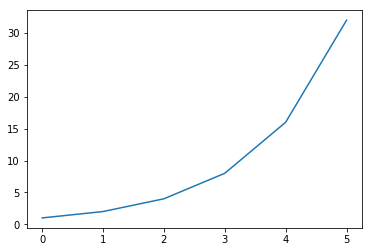

In [2]:
x = np.array([1, 2, 4, 8, 16, 32], dtype=np.float)
plt.plot(x)

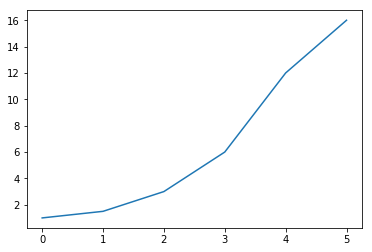

In [3]:
np.gradient(x)
plt.plot(np.gradient(x))

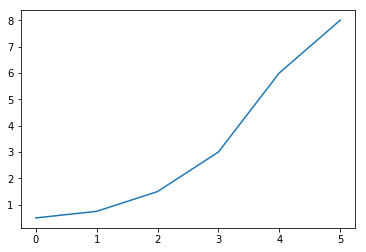

In [4]:
np.gradient(x, 2)
plt.plot(np.gradient(x, 2))

In [8]:
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.ephys.ephys_extractor import EphysSweepFeatureExtractor

ctc = CellTypesCache(manifest_file='cell_types/manifest.json')
data_set = ctc.get_ephys_data(464212183)

2018-04-03 08:28:40,275 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/491202878


In [9]:
sweep_number = 35
sweep_data = data_set.get_sweep(sweep_number)

In [10]:
i = sweep_data["stimulus"] # in A
v = sweep_data["response"] # in V
i *= 1e12 # to pA
v *= 1e3 # to mV
sampling_rate = sweep_data["sampling_rate"] # in Hz
t = np.arange(len(v)) / sampling_rate

[Text(0,0.5,u'pA'), Text(0.5,0,u'seconds')]

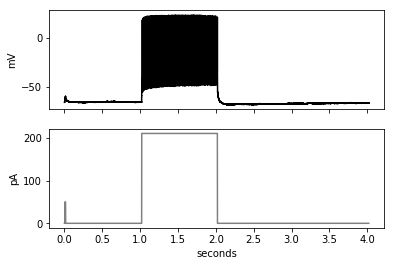

In [11]:
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(t, v, color='black')
axes[1].plot(t, i, color='gray')
axes[0].set(ylabel="mV")
axes[1].set(ylabel="pA", xlabel="seconds")

In [12]:
def get_sweep_v_i_t_from_set(data_set, sweep_number):
    """Given an NwbDataSet and a sweep number, return a tuple containing
    (response, stimulus, time_values).
    """
    sweep_data = data_set.get_sweep(sweep_number)
    i = sweep_data["stimulus"] # in A
    v = sweep_data["response"] # in V
    i *= 1e12 # to pA
    v *= 1e3 # to mV
    sampling_rate = sweep_data["sampling_rate"] # in Hz
    t = np.arange(len(v)) / sampling_rate
    return v, i, t

C:\anaconda2\lib\site-packages\allensdk\ephys\ephys_features.py:470: RuntimeWarning: invalid value encountered in less
  thresh_to_peak_levels[width_levels < v[spike_indexes]]


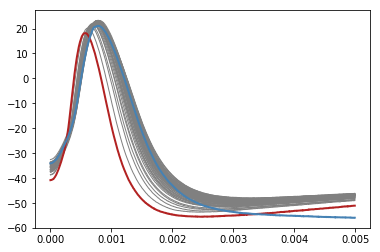

In [13]:
sweep_ext = EphysSweepFeatureExtractor(t=t, v=v, i=i, start=1, end=2)
sweep_ext.process_spikes()
features = ctc.get_ephys_features()
data_set = ctc.get_ephys_data(464212183)
sweep = 35
v, i, t = get_sweep_v_i_t_from_set(data_set, sweep)

dt = t[1] - t[0]
window = 0.005 # seconds
n_window_points = int(window / dt)

sweep_ext = EphysSweepFeatureExtractor(t=t, v=v, i=i, start=1.02, end=2.02)
sweep_ext.process_spikes()

fig, ax = plt.subplots(1, 1)
threshold_indexes = sweep_ext.spike_feature("threshold_index").astype(int)
for count, spike_index in enumerate(threshold_indexes):
    if count == 0:
        color, zorder, linewidth = ("firebrick", 20, 2)
    elif count == len(threshold_indexes) - 1:
        color, zorder, linewidth = ("steelblue", 20, 2)
    else:
        color, zorder, linewidth = ("gray", 0, 1)

    ax.plot(t[0:n_window_points], v[spike_index:spike_index + n_window_points], color=color, zorder=zorder, linewidth=linewidth)

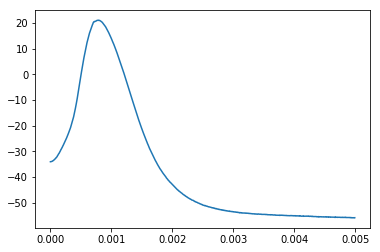

In [14]:
plt.plot(t[0:n_window_points],v[spike_index:spike_index + n_window_points])

Text(0.5,1,u'AP Derivative np.diff')

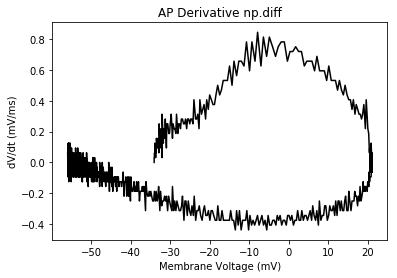

In [15]:
new_array = v[spike_index:spike_index + n_window_points]
dx = np.diff(new_array)
plt.plot(new_array[:-1],dx,color = 'black')
plt.xlabel('Membrane Voltage (mV)')
plt.ylabel('dV/dt (mV/ms)')
plt.title('AP Derivative np.diff')

Text(0.5,1,u'AP Derivative np.gradient')

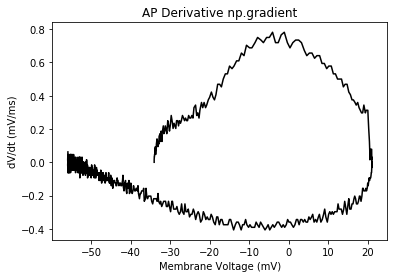

In [16]:
voltage = v[spike_index:spike_index + n_window_points]
dv = np.gradient(voltage)
plt.plot(new_array,dv,color = 'black')
plt.xlabel('Membrane Voltage (mV)')
plt.ylabel('dV/dt (mV/ms)')
plt.title('AP Derivative np.gradient')


In [17]:
sampling_rate

200000.0

In [18]:
new_array

array([-34.03125   , -34.03125   , -34.        , -33.96875   ,
       -33.9375    , -33.875     , -33.843754  , -33.71875   ,
       -33.65625   , -33.625     , -33.531254  , -33.46875   ,
       -33.3125    , -33.1875    , -33.09375   , -33.        ,
       -32.84375   , -32.78125   , -32.53125   , -32.4375    ,
       -32.28125   , -32.0625    , -32.03125   , -31.71875   ,
       -31.593752  , -31.375002  , -31.21875   , -30.9375    ,
       -30.843752  , -30.593752  , -30.34375   , -30.156252  ,
       -29.968752  , -29.718752  , -29.406252  , -29.250002  ,
       -29.000002  , -28.78125   , -28.562502  , -28.375     ,
       -28.0625    , -27.875     , -27.625     , -27.375002  ,
       -27.15625   , -26.875     , -26.59375   , -26.34375   ,
       -26.093752  , -25.812502  , -25.59375   , -25.3125    ,
       -25.03125   , -24.781252  , -24.500002  , -24.218752  ,
       -23.96875   , -23.5625    , -23.28125   , -23.        ,
       -22.6875    , -22.468752  , -22.0625    , -21.75

In [19]:
import scipy.signal as signal
N = 4
Wn = 0.1
B,A = signal.butter(N, Wn, output = 'ba')

dv_f = signal.filtfilt(B,A,dv)

Text(0.5,1,u'AP Derivative np.gradient')

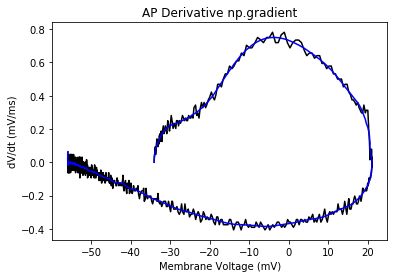

In [20]:
plt.plot(new_array,dv,color = 'black')
plt.plot(new_array,dv_f,color = 'blue')
plt.xlabel('Membrane Voltage (mV)')
plt.ylabel('dV/dt (mV/ms)')
plt.title('AP Derivative np.gradient')

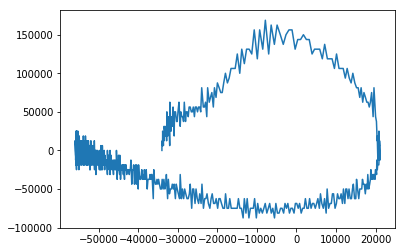

In [28]:
#Phase plot
phase_plot = voltage
dv = np.diff(phase_plot)
dv_f = signal.filtfilt(B,A,dv)
plt.plot(phase_plot[:-1]*1000,dv*sampling_rate)

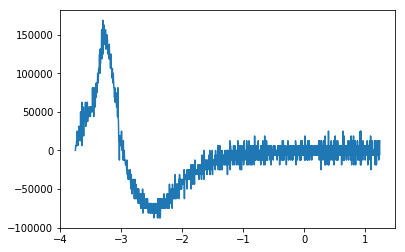

In [33]:
ap_deriv = voltage

dv = np.diff(ap_deriv)
dv_f = signal.filtfilt(B,A,dv)
#plt.plot(np.arange(0,len(ap_deriv)-1),dv*sampling_rate,color = 'black')
plt.plot(np.arange(-(len(ap_deriv)*3/4),len(ap_deriv)/4)*1000/sampling_rate,dv*sampling_rate)